## 空き家問題


データ  
・統計局「住宅・土地統計調査 平成30年住宅・土地統計調査 住宅及び世帯に関する基本集計 全国・都道府県・市区町村 」

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/空き家/FEH_00200522_230330202410.csv")

UnicodeDecodeError: ignored

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/空き家/FEH_00200522_230330202410.csv", encoding = "shift-jis")

In [ ]:
df.head()

,表章項目 コード,表章項目,時間軸(年次) コード,時間軸(年次),地域 コード,地域,/居住世帯の有無,総数,居住世帯あり,同居世帯なし,...,居住世帯なし,一時現在者のみ,空き家,二次的住宅,別荘,その他,賃貸用の住宅,売却用の住宅,その他の住宅,建築中
0,01-2018,住宅数【戸】,2018000000,2018年,0,全国,NaN,"62,407,400","53,616,300","53,330,100",...,"8,791,100","216,700","8,488,600","381,000","260,800","120,100","4,327,200","293,200","3,487,200","85,800"
1,01-2018,住宅数【戸】,2018000000,2018年,1000,北海道,NaN,"2,807,200","2,416,700","2,400,700",...,"390,500","5,200","379,800","8,900","5,000","4,000","204,600","9,000","157,300","5,500"
2,01-2018,住宅数【戸】,2018000000,2018年,1100,札幌市,NaN,"1,051,400","920,900","914,300",...,"130,500","1,200","125,400","2,100",900,"1,200","76,100","2,900","44,300","3,900"
3,01-2018,住宅数【戸】,2018000000,2018年,2000,青森県,NaN,"592,400","501,500","498,300",...,"91,000","1,700","88,700","2,200","1,100","1,100","39,200","1,400","45,800",600
4,01-2018,住宅数【戸】,2018000000,2018年,3000,岩手県,NaN,"579,300","483,600","481,800",...,"95,700","1,800","93,500","3,500","2,000","1,600","38,600","1,100","50,200",500


In [ ]:
# 分析で使うデータのみ抽出
df1 = df.iloc[1:, 8:]

In [ ]:
df1.head()

,居住世帯あり,同居世帯なし,同居世帯あり,居住世帯なし,一時現在者のみ,空き家,二次的住宅,別荘,その他,賃貸用の住宅,売却用の住宅,その他の住宅,建築中
1,"2,416,700","2,400,700","16,000","390,500","5,200","379,800","8,900","5,000","4,000","204,600","9,000","157,300","5,500"
2,"920,900","914,300","6,600","130,500","1,200","125,400","2,100",900,"1,200","76,100","2,900","44,300","3,900"
3,"501,500","498,300","3,200","91,000","1,700","88,700","2,200","1,100","1,100","39,200","1,400","45,800",600
4,"483,600","481,800","1,800","95,700","1,800","93,500","3,500","2,000","1,600","38,600","1,100","50,200",500
5,"953,600","950,000","3,500","135,700","3,400","130,500","3,700","2,000","1,800","72,700","3,600","50,400","1,800"


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 1 to 68
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   居住世帯あり   68 non-null     object
 1   同居世帯なし   68 non-null     object
 2   同居世帯あり   68 non-null     object
 3   居住世帯なし   68 non-null     object
 4   一時現在者のみ  68 non-null     object
 5   空き家      68 non-null     object
 6   二次的住宅    68 non-null     object
 7   別荘       68 non-null     object
 8   その他      68 non-null     object
 9   賃貸用の住宅   68 non-null     object
 10  売却用の住宅   68 non-null     object
 11  その他の住宅   68 non-null     object
 12  建築中      68 non-null     object
dtypes: object(13)
memory usage: 7.0+ KB


In [ ]:
df1.astype(int)

ValueError: ignored

In [ ]:
df1 = df1.replace(',', '', regex=True)

In [ ]:
df1.head()

,居住世帯あり,同居世帯なし,同居世帯あり,居住世帯なし,一時現在者のみ,空き家,二次的住宅,別荘,その他,賃貸用の住宅,売却用の住宅,その他の住宅,建築中
1,2416700,2400700,16000,390500,5200,379800,8900,5000,4000,204600,9000,157300,5500
2,920900,914300,6600,130500,1200,125400,2100,900,1200,76100,2900,44300,3900
3,501500,498300,3200,91000,1700,88700,2200,1100,1100,39200,1400,45800,600
4,483600,481800,1800,95700,1800,93500,3500,2000,1600,38600,1100,50200,500
5,953600,950000,3500,135700,3400,130500,3700,2000,1800,72700,3600,50400,1800


In [ ]:
df1.astype(int)

ValueError: ignored

In [ ]:
# 「-」をいったん0で設定
df1 = df1.replace('-', 0, regex=True)

In [ ]:
df1.astype(int)

,居住世帯あり,同居世帯なし,同居世帯あり,居住世帯なし,一時現在者のみ,空き家,二次的住宅,別荘,その他,賃貸用の住宅,売却用の住宅,その他の住宅,建築中
1,2416700,2400700,16000,390500,5200,379800,8900,5000,4000,204600,9000,157300,5500
2,920900,914300,6600,130500,1200,125400,2100,900,1200,76100,2900,44300,3900
3,501500,498300,3200,91000,1700,88700,2200,1100,1100,39200,1400,45800,600
4,483600,481800,1800,95700,1800,93500,3500,2000,1600,38600,1100,50200,500
5,953600,950000,3500,135700,3400,130500,3700,2000,1800,72700,3600,50400,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,317100,315300,1800,45000,900,43500,500,100,300,24900,1300,16900,700
65,481800,480300,1500,100000,1700,97700,4800,3200,1500,42100,2100,48700,600
66,460200,458100,2100,86200,1600,84200,1500,400,1000,30900,2000,49900,400
67,709000,705000,4000,170400,1900,167000,4200,2500,1700,53600,3900,105200,1500


説明変数と目的変数の設定

In [ ]:
x = df1.drop('空き家', axis=1)
y = df1['空き家']

学習用と検証用のデータで分ける

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

学習

In [ ]:
reg = RandomForestRegressor()

In [ ]:
reg.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_reg = reg.predict(x_test)

In [ ]:
r2_score(y_test, y_pred_reg)

0.9925656905229178

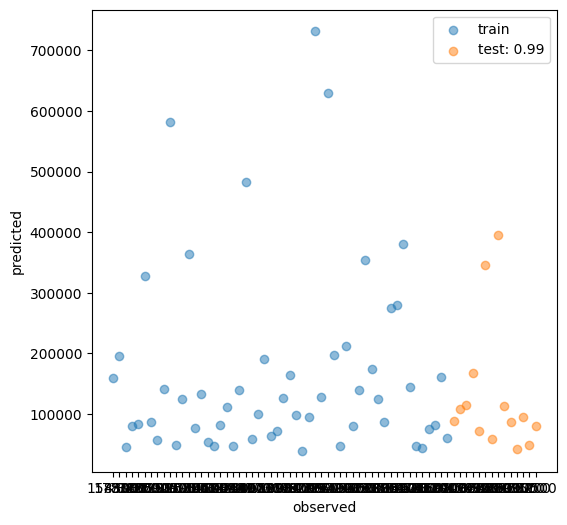

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_train, reg.predict(x_train), alpha = 0.5, label = "train")
plt.scatter(y_test, y_pred_reg, alpha = 0.5, label = "test: %.2f" %r2_score(y_test, y_pred_reg))
plt.xlabel("observed")
plt.ylabel("predicted")
plt.legend()

In [ ]:
reg.feature_importances_

array([0.11177067, 0.06567892, 0.03974324, 0.27801619, 0.09724353,
       0.00125993, 0.00542272, 0.08157908, 0.14405117, 0.06473755,
       0.06313792, 0.04735907])